In [1]:
# -- Import all relevant libraries for data processing/visualization
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import numpy as np
import pandas as pd

In [2]:
# -- Import all relevant machine learning libraries (mainly sklearn)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [3]:
# -- Other useful libraries
import random 
import os
import warnings
import itertools

In [4]:
# -- Set up system level parameters
warnings.filterwarnings("ignore")
plt.style.use('seaborn-darkgrid')
random.seed(42) 

## Part-1: Loading the data and analyze

In [5]:
def load_data(csv_path):
    ''' Helper: Read the csv file and load the data '''
    return pd.read_csv(csv_path)

In [6]:
# -- Loading the datasets for our analysis
train_trendency = load_data("./data/train_trendency.csv")
train_vaccine = load_data("./data/train_vaccine.csv")
test_data = load_data("./data/test.csv")

#### 1. Basic statistics and exploration of the given dataset

In [7]:
# -- Visuzalize First Few Rows of Dataset
train_trendency.columns = ['ID', 'State', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Incident_Rate', 'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate']
train_trendency['Date'] = pd.to_datetime(train_trendency['Date'])
train_trendency.head()

,ID,State,Date,Confirmed,Deaths,Recovered,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate
0,0,Alabama,2021-01-12,407848,5573,211684.0,190591.0,8318.021857,1981019.0,1.366440,40402.697430
1,1,Alaska,2021-01-12,50544,225,7165.0,43132.0,6906.205360,1357708.0,0.445351,185594.597735
2,2,Arizona,2021-01-12,636100,10482,86757.0,538861.0,8739.177523,5742443.0,1.647854,42806.225328
3,3,Arkansas,2021-01-12,259553,4121,229700.0,25732.0,8600.724235,2208736.0,1.587730,73190.174047
4,4,California,2021-01-12,2832085,31345,NaN,2773506.0,7098.216165,36508384.0,1.110900,92397.696784


In [8]:
# -- Visuzalize First Few Rows of Dataset
train_vaccine.columns = ['ID', 'Date', 'State', 'Total_Vaccinations', 'People_Fully_Vaccinated']
train_vaccine['Date'] = pd.to_datetime(train_vaccine['Date'])
train_vaccine['Date'] = train_vaccine['Date'].dt.strftime('%m-%d-%Y')
train_vaccine['Date'] = pd.to_datetime(train_vaccine['Date'])
train_vaccine.head()

,ID,Date,State,Total_Vaccinations,People_Fully_Vaccinated
0,0,2021-01-12,Alabama,78134.0,7270.0
1,1,2021-01-12,Alaska,35838.0,5400.0
2,2,2021-01-12,Arizona,141355.0,8343.0
3,3,2021-01-12,Arkansas,40879.0,8.0
4,4,2021-01-12,California,816301.0,100089.0


In [9]:
# -- Visuzalize First Few Rows of Dataset
test_data.columns = ['ID', 'State', 'Date', 'Confirmed', 'Deaths']
test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data = test_data.drop(['Confirmed', 'Deaths'], axis=1)
test_data.head()

,ID,State,Date
0,0,Alabama,2021-04-01
1,1,Alaska,2021-04-01
2,2,Arizona,2021-04-01
3,3,Arkansas,2021-04-01
4,4,California,2021-04-01


#### 2. Datasets info on data types

In [10]:
# -- Generate Info about Data Types
train_trendency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3950 entries, 0 to 3949
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   3950 non-null   int64         
 1   State                3950 non-null   object        
 2   Date                 3950 non-null   datetime64[ns]
 3   Confirmed            3950 non-null   int64         
 4   Deaths               3950 non-null   int64         
 5   Recovered            2017 non-null   float64       
 6   Active               2700 non-null   float64       
 7   Incident_Rate        3950 non-null   float64       
 8   Total_Test_Results   3950 non-null   float64       
 9   Case_Fatality_Ratio  3950 non-null   float64       
 10  Testing_Rate         3950 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 339.6+ KB


In [11]:
# -- Generate Info about Data Types
train_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3871 entries, 0 to 3870
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       3871 non-null   int64         
 1   Date                     3871 non-null   datetime64[ns]
 2   State                    3871 non-null   object        
 3   Total_Vaccinations       3675 non-null   float64       
 4   People_Fully_Vaccinated  3616 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 151.3+ KB


In [12]:
# -- Generate Info about Data Types
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      1500 non-null   int64         
 1   State   1500 non-null   object        
 2   Date    1500 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 35.3+ KB


#### 3. Dropping certain features not necessary for our models

In [13]:
# -- Merging both datasets using a right join on common columns Date/State
#data = pd.merge(train_trendency, train_vaccine, on=['Date', 'State'], how='right')
data = train_trendency
# -- Drop unnecessary columns since not necessary for model training
columns = ['Recovered', 'Active', 'Incident_Rate', 'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate']
data = data.drop(columns, axis=1)

# -- Display few first rows of new dataset
data.head()

,ID,State,Date,Confirmed,Deaths
0,0,Alabama,2021-01-12,407848,5573
1,1,Alaska,2021-01-12,50544,225
2,2,Arizona,2021-01-12,636100,10482
3,3,Arkansas,2021-01-12,259553,4121
4,4,California,2021-01-12,2832085,31345


#### 4. Checking for null values

In [14]:
# -- Find Columns With Null Values
data.isnull().any()

ID           False
State        False
Date         False
Confirmed    False
Deaths       False
dtype: bool

#### 5. Get both target values (confirmed and deaths) from datasets

In [15]:
# -- Store target attribute separately
confirmed = data['Confirmed'].copy()
deaths = data['Deaths'].copy()

# -- Set the date as index of our dataset
data = data.set_index('Date')

# -- Visuzalize first few rows of new dataset
data.head()

,ID,State,Confirmed,Deaths
Date,,,,
2021-01-12,0,Alabama,407848,5573
2021-01-12,1,Alaska,50544,225
2021-01-12,2,Arizona,636100,10482
2021-01-12,3,Arkansas,259553,4121
2021-01-12,4,California,2832085,31345


#### 6. Run more in-depth statistics about features (i.e., correlation matrix, etc.)

##### a. Targets distribution (checking for dataset balance)

<AxesSubplot:>

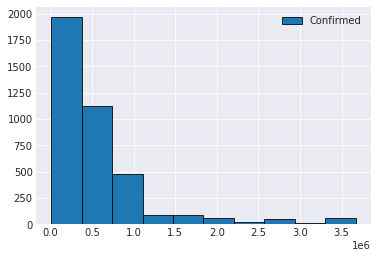

In [16]:
# -- Plotting Histogram of Sick vs Non-Sick individuals in our dataset (note: 0 is non-stroke and 1 is stroke)
confirmed.hist(bins=10, legend="true", edgecolor='black', linewidth=0.8)

<AxesSubplot:>

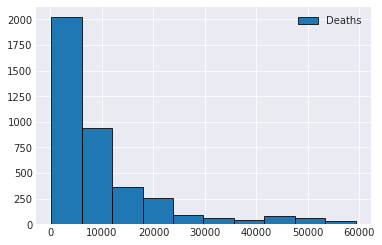

In [17]:
# -- Plotting Histogram of Sick vs Non-Sick individuals in our dataset (note: 0 is non-stroke and 1 is stroke)
deaths.hist(bins=10, legend="true", edgecolor='black', linewidth=0.8)

## Part-2: Prepare a data processing pipeline

#### 1. Visualize timely trends of deaths and confirmed cases accross all 50 states

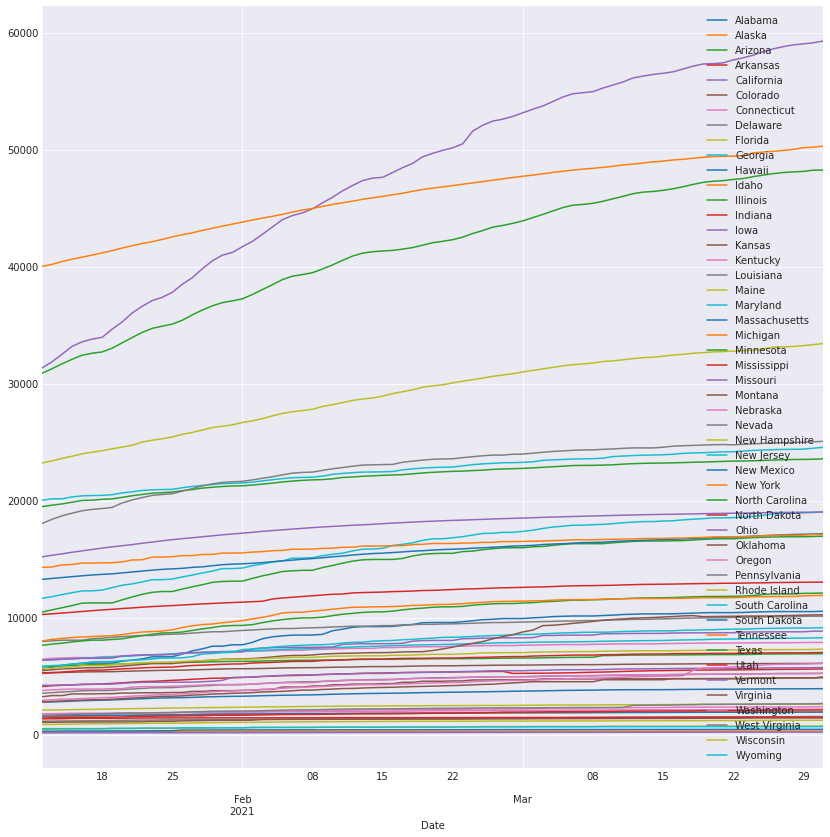

In [18]:
plot_deaths = data.groupby(by='State')['Deaths'].plot(figsize=(14, 14), legend=True)

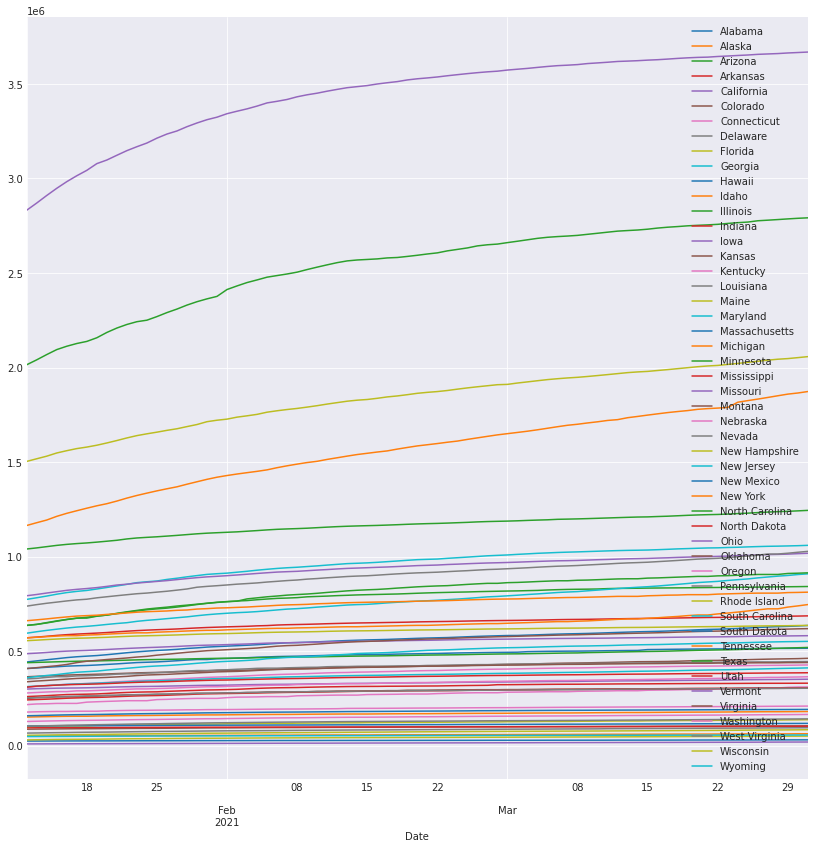

In [19]:
plot_confirmed = data.groupby(by='State')['Confirmed'].plot(figsize=(14, 14), legend=True)

#### b. Visualize and Analyze trends by states (small sample for our purpose)

In [20]:
def visualize_trend_of_state(trend, state):
    ''' Helper: plots the trends of the givens state '''
    state_data = data[data['State'] == state][trend]
    state_data.plot(legend=True)

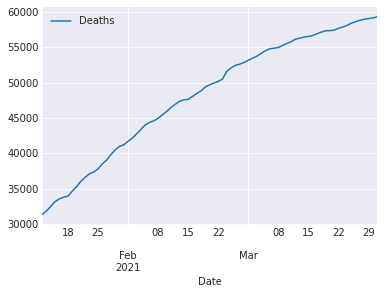

In [21]:
# -- Visualize number of deaths in california across time
visualize_trend_of_state('Deaths', 'California')

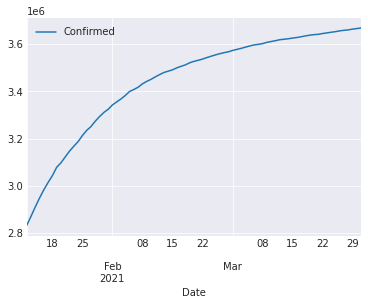

In [22]:
# -- Visualize number of confirmed cases in california across time
visualize_trend_of_state('Confirmed', 'California')

## Part-3: Model Selection and Training

In [23]:
import warnings
warnings.filterwarnings('ignore')

### 1. AutoRegressive Integrated Moving Average model

#### a. ARIMA model training

In [24]:
class ArimaModel():
    ''' Template class: for implementing the arima algorithm '''
    def __init__(self, y_train, trend='Deaths', test_flag=False):
        self.y_train = y_train
        self.trend = trend
        self.test_flag = test_flag
    
    def generate_pdq_values(self):
        ''' Generate parameters to be used by the model '''
        p = d = q = range(0, 2)
        pdq = list(itertools.product(p, d, q))
        s_pdq = [(x[0], x[1], x[2], 2) for x in list(itertools.product(p, d, q))]
        return pdq, s_pdq
    
    def train_model(self, y_train, parameter, s_parameter):
        ''' Train the Arima model based on given y_train data '''
        try:
            # -- Instantiate the model
            self.model = sm.tsa.statespace.SARIMAX(y_train, order=parameter,
                                              seasonal_order=s_parameter,
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)

            # -- Fit the mode (train)
            results = self.model.fit()
            
            # -- Return the model and the results
            return results
        except:
            return None
        
    def grid_search_best_model(self, y_train, pdq, s_pdq):
        ''' Trains multiple models with multiple parameters and returns the best '''
        models = []
        for parameter in pdq:
            for s_parameter in s_pdq:
                results = self.train_model(y_train, parameter, s_parameter)
                
                # -- Store results of each iteration
                if results != None:
                    models.append([parameter, s_parameter, results.aic])
                    
        # - - Find the best parameters based on lowest aic value
        parameter, s_parameter, aic = self.find_best_parameters(models)
        
        # -- Return those best parameters for our model
        return parameter, s_parameter
    
    def find_best_parameters(self, models):
        ''' Gets best model parameters from a list of models '''
        generator = (x for x in models)
        
        from operator import itemgetter
        best_parameter, best_sparameter, best_aic = min(generator, key=itemgetter(2))
        
        if self.test_flag:
            print('\t % -- Best Arima paramaters are: \n\n')
            print(f'pdq parameters: {best_param} \n')
            print(f'pdq (seasonal) parameters: {best_param_seasonal} \n\n')
            print(f'Resulting AIC: {best_aic}\n')
        
        return best_parameter, best_sparameter, best_aic
                
    def train_best_model(self, y_train, parameter, s_parameter):
        ''' Run this after grid search model '''
        self.results = self.train_model(y_train, parameter, s_parameter)
        
    def generate_model_statistics(self):
        ''' Generate some statistics about the training '''
        print(self.results.summary().tables[1])
        
    def generate_model_diagnostics(self):
        ''' Generate some diagnostics about the data '''
        self.results.plot_diagnostics(figsize=(16, 8))
        
    def generate_forecasts(self, y_train, startdate='2021-02-12'):
        ''' Compare actual data and forecast predictions on training data '''
        # -- Get the predictions
        prediction = self.results.get_prediction(start=pd.to_datetime(startdate), dynamic=False)
        prediction_ci = prediction.conf_int()

        # -- Set up the plots
        ax = self.y_train['2021':].plot(label='Actual')
        prediction.predicted_mean.plot(ax=ax, label='Prediction', alpha=.7, figsize=(14, 7))
        ax.fill_between(prediction_ci.index,prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color='k', alpha=.2)

        ax.set_xlabel('Date')
        ax.set_ylabel(self.trend)
        plt.legend()
        
    def get_rmse(self, startdate='2021-02-12'):
        ''' Compute the model RMSE '''
        prediction = self.results.get_prediction(start=pd.to_datetime(startdate), dynamic=False)
        
        y_predicted = prediction.predicted_mean
        y_true = self.y_train['2021-02-12':]

        # Compute the mean square error
        mse = ((y_predicted - y_true) ** 2).mean()
        rmse = np.sqrt(mse)
        
        # Print those values
        print(f'The MSE of our model predictions is {round(mse, 2)}')
        print(f'The RMSE of our model predictions is {round(rmse, 2)}')
        
        return mse, rmse
    
    def generate_future_forecasts(self):
        ''' Generate future forecasts on test data '''
        prediction_uc = self.results.get_forecast(steps=30)
        prediction_ci = prediction_uc.conf_int()

        ax = self.y_train.plot(label='Observed', figsize=(14, 7))
        prediction_uc.predicted_mean.plot(ax=ax, label='Prediction')
        ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color='k', alpha=.25)
        ax.set_xlabel('Date')
        ax.set_ylabel(self.trend)

        plt.legend()
        
    def predict_test_set(self):
        prediction_uc = self.results.get_forecast(steps=30)
        prediction_ci = prediction_uc.conf_int()
        
        return prediction_uc, prediction_ci      

#### b. Example: Train the Arima model on california for the number of deaths 

In [25]:
def run_one_example(state, trend):
    ''' Helper function to train and generate statistics of one example '''
    y_train = data[data['State'] == state][trend]
    
    model = ArimaModel(trend='Deaths', y_train=y_train)
    pdq, s_pdq = model.generate_pdq_values()
    parameter, s_parameter = model.grid_search_best_model(y_train, pdq, s_pdq)
    model.train_best_model(y_train, parameter, s_parameter)
    
    print('\t % -- Results for: \n')
    print('Model: ARIMA\n')
    mse, rmse = model.get_rmse(startdate='2021-02-12')
    
    plt.figure()
    model.generate_forecasts(y_train, startdate='2021-02-12')
    
    plt.figure()
    model.generate_future_forecasts()

#### c. Prepare a submission formatter class 

In [26]:
class SubmissionFormatter():
    ''' Template class: to make predictions and draft submission file '''
    def __init__(self):
        pass
    
    def get_all_states(self):
        ''' Helper: Returns a list of all 50 states in dataset '''
        return data['State'].unique()
    
    def format_data(self, prediction, trend, state):
        ''' Helper: format final dataframe of given state and trend as Data|Trend|State '''
        # -- Compute average of lower and upper values of trend and drop them from dataframe
        prediction[trend] = (prediction[f'lower {trend}'] + prediction[f'upper {trend}']) / 2
        prediction = prediction.drop([f'lower {trend}', f'upper {trend}'], axis=1)
        
        # -- Generate the State column and add it to dataframe
        prediction['State'] = state
        
        # -- Reset the indexing to default and finalize formatting as Data|Trend|State
        prediction.reset_index(inplace=True)
        prediction.columns = ['Date', trend, 'State']
        
        # -- return final dataframe of Data|Trend|State for given state and trend
        return prediction
    
    def compute_predictions(self, trend, state):
        ''' Helper: Compute the predictions of Arima model and format data nicely for each state and trend '''
        # -- Get the y_train data as date as index and the values of training trends
        y_train = data[data['State'] == state][trend]
        
        # -- Instantiate Arima model based on given trend (Deaths or Confirmed)
        model = ArimaModel(y_train, trend=trend)
        
        # -- Generate a set of pdq values for the model to run a grid search on
        pdq, s_pdq = model.generate_pdq_values()
        
        # -- Run grid-search and return the best parameters for the model
        parameter, s_parameter = model.grid_search_best_model(y_train, pdq, s_pdq)
        
        # -- Train the model based on the best parameters returned
        model.train_best_model(y_train, parameter, s_parameter)
        
        # -- Generate predictions on test-set
        _, prediction = model.predict_test_set()
        
        # -- Finalize a properly formatted dataframe for that state and trend and return it
        final_data = self.format_data(prediction, trend, state)
        return final_data
    
    def generate_predictions(self):
        ''' Main function: generate predictions for all 50 states and dates in dataset '''
        states = self.get_all_states()

        all_data = []
        # -- Loop through all unique states and make predictions
        for i,state in enumerate(states):
            print(f'Iteration #{i}: {state}')
            # -- Generate Deaths and Confirmed predictions for each state
            deaths = self.compute_predictions('Deaths', state)
            confirmed = self.compute_predictions('Confirmed', state)

            # -- Merging both datasets using a right join on common columns Date/State
            data = pd.merge(deaths, confirmed, on=['Date', 'State'], how='right')

            # -- Mergin with test_data to get the ID of each
            data = pd.merge(test_data, data, on=['Date', 'State'], how='right')

            # -- Append to the whole list
            all_data.append(data)

        return all_data
    
    def drop_all_nan_rows(self, all_data):
        ''' Helper: drop all rows where no prediction has been made '''
        new_data = []
        for df in all_data:
            new_df = df[df['Deaths'].notna()]
            new_data.append(new_df)
        return new_data
    
    def make_submission_data(self, new_data):
        ''' Main submission function: concatenate all dataframes into one submission dataframe '''
        submission = pd.concat(new_data, ignore_index=True)
        
        # -- Properly format the dataframe to match the submission form
        submission = submission.sort_values(by=['ID'])
        submission = submission.drop(['State', 'Date'], axis=1)
        submission = submission[['ID', 'Confirmed', 'Deaths']]
        
        # -- Save to .csv file
        submission.to_csv('Team1.csv', index=False)
        print('Successfully generated submission file as: Team1.csv')
        
        # -- Ready to submit dataframe
        return submission

#### d. Train multiple Arima models for each state and trend and format final predictions into a .csv file

In [27]:
def run_arima_model():
    ''' Helper to run the whole models on all dataset '''
    # -- Instantiate the formatter
    formatter = SubmissionFormatter()

    # -- Generate the predictions for the whole dataset 
    all_data = formatter.generate_predictions()

    # -- Remove rows containing NaN values (shouldn't change much)
    new_data = formatter.drop_all_nan_rows(all_data)

    # -- Draft the final submission file and save it in current directory
    submission = formatter.make_submission_data(new_data)

### 2. Recurrent Long-Term Short-Term Memory Network (LSTM)

In [28]:
# -- Importing useful libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

#### a. Data Formatter Model Preparation (convert dataset into proper LSTM sequence inputs)

In [29]:
class DataFormatter():
    ''' Template class: for the data preparation step of LSTM model '''
    def __init__(self, trend='Deaths', state='California', window_size=1):
        self.data = data[data['State'] == state][trend]
        self.window_size = window_size
        
    def prepare_dataset(self, test_data=None):
        ''' Normalize features '''
        # -- Get the numpy array of values
        dataset = self.data.values
        
        # -- For walk forward validation and prediction
        if test_data != None:
            np.append(dataset, test_data)
            
        dataset = dataset.astype('float32')
        dataset = np.reshape(dataset , (-1, 1))
        
        # -- Normalize dataset
        scaler = MinMaxScaler(feature_range=(0, 1))
        dataset = scaler.fit_transform(dataset)
        
        # -- update member variable
        self.dataset = dataset 
        
        return dataset, scaler
    
    def split_dataset(self, dataset):
        ''' Split into 80% train and 20% test cohorts '''
        data_size = len(dataset)
        
        # -- Get the appropriate sizes 
        train_size = data_size - self.window_size - 30 #int(data_size * 0.8)
        test_size = data_size - train_size
        
        # -- Split the dataset sequentially
        train, test = dataset[0:train_size, :], dataset[train_size:data_size, :]
        
        return train, test
    
    def convert_to_sequence_matrix(self, dataset):
        ''' Convert into a matrix of sequences based on window size '''
        X_column, y_column = [], []
        data_size = len(dataset)
        
        for i in range(data_size - self.window_size):
            x, y = dataset[i:(i + self.window_size), 0], dataset[i + self.window_size, 0]
            X_column.append(x)
            y_column.append(y)
            
        return np.array(X_column), np.array(y_column)
    
    def get_training_testing_sets(self, train, test):
        ''' Generate final training/testing sets for LSTM model '''
        # -- Perform the conversion
        X_train, y_train = self.convert_to_sequence_matrix(train)
        X_test, y_test = self.convert_to_sequence_matrix(test)
        
        # -- Reshape to (samples, timesteps, features) from (samples, features)
        X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
        X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
        
        # -- return prepared cohorts 
        return X_train, y_train, X_test, y_test

#### b. Model Preparation

In [30]:
class LstmModel():
    ''' Template class: for LSTM model '''
    def __init__(self, log=False):
        self.log = log
    
    def build_model(self, window_size=1):
        ''' Build the overall architecture of the model '''
        self.model = Sequential()
        
        # -- Add the LSTM layer and a dense hidden layer
        self.model.add(LSTM(252, input_shape=(1, window_size)))
        self.model.add(Dense(1))
        
        # -- Compile the model
        self.model.compile(loss='mean_squared_error', optimizer='adam')
        
        if self.log:
            print('\t % -- Model Constructed')
        
    def train_model(self, X_train, y_train):
        ''' Train the LSTM model '''
        if self.log:
            print('\t % -- Training Model...')
            
        # -- Train the model here
        self.model.fit(X_train, y_train, epochs=120, batch_size=1, verbose=0)
        
        if self.log:
            print('\t % -- Model Successfully Trained.')
            
    def get_rmse(self, X, y, scaler, set_type='test'):
        ''' Make predictions on given set and compute rmse of the model '''
        # -- Generate predictions
        y_pred = self.model.predict(X)
        
        # -- Invert predictions
        y_pred = scaler.inverse_transform(y_pred)
        
        y = np.reshape(y , (-1, 1))
        y_true = scaler.inverse_transform(y)
        
        # -- Compute rmse score
        mse = mean_squared_error(y_true[:, 0], y_pred[:, 0])
        rmse = np.sqrt(mse)
        
        if self.log:
            print(f'\t % -- The models RMSE on {set_type} set is: {rmse}')
        
        return rmse
        
    def plot_predictions(self, dataset, X_train, y_train, X_test, y_test, scaler, window_size=1):
        ''' Visualize plots of the predictions made '''
        # -- Generate predictions
        y_pred_train = self.model.predict(X_train)
        y_pred_test = self.model.predict(X_test)
        
        # -- Invert predictions
        y_pred_train = scaler.inverse_transform(y_pred_train)
        y_pred_test = scaler.inverse_transform(y_pred_test)
        
        # -- Prepare train plots
        pred_train_plot = np.empty_like(dataset)
        pred_train_plot[:, :] = np.nan
        pred_train_plot[window_size:len(y_pred_train) + window_size, :] = y_pred_train
        
        # -- Prepare test plots
        pred_test_plot = np.empty_like(dataset)
        pred_test_plot[:, :] = np.nan
        pred_test_plot[len(y_pred_train) + (window_size*2):len(dataset), :] = y_pred_test
        
        plt.plot(scaler.inverse_transform(dataset), label='Actual')
        plt.plot(pred_train_plot, label='Train Predicted')
        plt.plot(pred_test_plot, label='Test Predicted')
        plt.legend()
        
    def get_prediction(self, X_test, scaler):
        ''' Compute only one prediction at a time '''
        y_pred_test = self.model.predict(X_test)
        y_pred_test = scaler.inverse_transform(y_pred_test)
        return y_pred_test

In [31]:
def walk_forward_validation(days):
    ''' Make a prediction and append it to the dataset, retrain model and keep predicting '''
    predictions = []
    formatter = DataFormatter(window_size=3)
    model = LstmModel(log=False)
    model.build_model(window_size=3)
    pred = None

    for day in range(days):
        dataset, scaler = formatter.prepare_dataset(test_data=pred)
        train, test = formatter.split_dataset(dataset)
        X_train, y_train, X_test, y_test = formatter.get_training_testing_sets(train, test)
        
        model.train_model(X_train, y_train)
        pred = model.get_prediction(X_test, scaler)[0][0]
        predictions.append(pred)

    return predictions

#### c. Run the model

In [32]:
def run_lstm_model(state, trend):
    ''' Helper function to run the model and generate results '''
    # -- Format the data properly for lstm model
    formatter = DataFormatter(trend=trend, state=state, window_size=1)
    dataset, scaler = formatter.prepare_dataset()
    train, test = formatter.split_dataset(dataset)
    X_train, y_train, X_test, y_test = formatter.get_training_testing_sets(train, test)
    
    # -- Build and run the lstm model
    model = LstmModel(log=True)
    model.build_model(window_size=1)
    model.train_model(X_train, y_train)
    
    # -- get the mse and rmse of the model
    model.get_rmse(X_train, y_train, scaler, set_type='train')
    model.get_rmse(X_test, y_test, scaler, set_type='test')
    
    # -- Plot train and test predictions vs actual
    model.plot_predictions(dataset, X_train, y_train, X_test, y_test, scaler, window_size=1)

## Part-4: Reproduce model's results 

#### a. Generate Statistics for one example using ARIMA model (state of California, and Deaths)

	 % -- Results for: 

Model: ARIMA

The MSE of our model predictions is 25398.78
The RMSE of our model predictions is 159.37


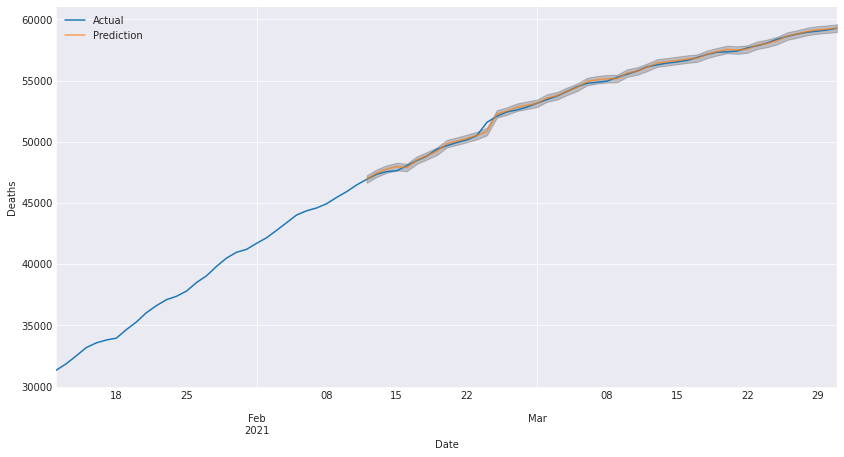

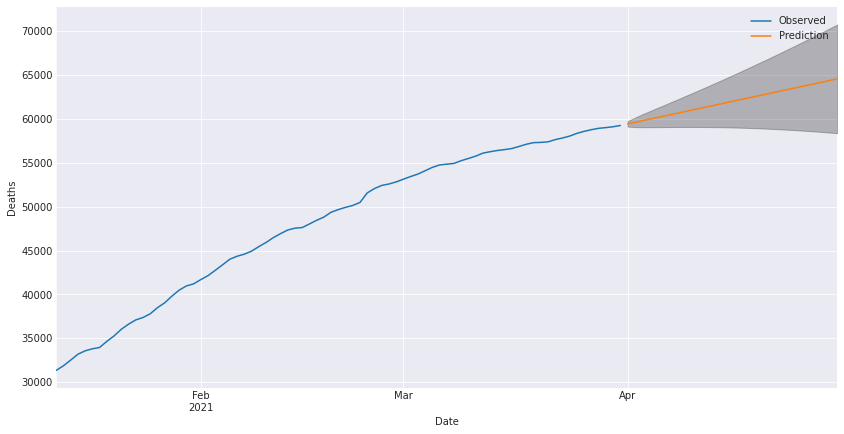

In [33]:
# -- Note: you can change those parameters to generate results for other states and trends
run_one_example(trend='Deaths', state='California')

#### b. Run the best performing model (ARIMA) and Format the .csv submission file

In [34]:
# -- Runs the arima model (best) and generate submission file submitted in Kaggle
# -- Note: the runtime is approximately 5min to 10min depending on your pc
run_arima_model()

Iteration #0: Alabama
Iteration #1: Alaska
Iteration #2: Arizona
Iteration #3: Arkansas
Iteration #4: California
Iteration #5: Colorado
Iteration #6: Connecticut
Iteration #7: Delaware
Iteration #8: Florida
Iteration #9: Georgia
Iteration #10: Hawaii
Iteration #11: Idaho
Iteration #12: Illinois
Iteration #13: Indiana
Iteration #14: Iowa
Iteration #15: Kansas
Iteration #16: Kentucky
Iteration #17: Louisiana
Iteration #18: Maine
Iteration #19: Maryland
Iteration #20: Massachusetts
Iteration #21: Michigan
Iteration #22: Minnesota
Iteration #23: Mississippi
Iteration #24: Missouri
Iteration #25: Montana
Iteration #26: Nebraska
Iteration #27: Nevada
Iteration #28: New Hampshire
Iteration #29: New Jersey
Iteration #30: New Mexico
Iteration #31: New York
Iteration #32: North Carolina
Iteration #33: North Dakota
Iteration #34: Ohio
Iteration #35: Oklahoma
Iteration #36: Oregon
Iteration #37: Pennsylvania
Iteration #38: Rhode Island
Iteration #39: South Carolina
Iteration #40: South Dakota
Iter

#### c. Run the least performant model (RNN) and generate statistics about the results

	 % -- Model Constructed
	 % -- Training Model...
	 % -- Model Successfully Trained.
	 % -- The models RMSE on train set is: 193.2177276611328
	 % -- The models RMSE on test set is: 88.59292602539062


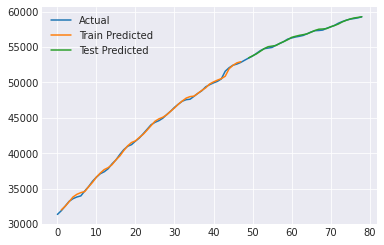

In [35]:
# -- Runs one example of the RNN model on deaths in California
# -- Note: to generate for all states, a for loop suffices
# -- but it was not necessary since the performance is not ideal
run_lstm_model(trend='Deaths', state='California')